# Data Visualisation

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
apple_data <- read_csv("../data/apple_mobility_data.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  geo_type = col_character(),
  region = col_character(),
  transportation_type = col_character(),
  alternative_name = col_character(),
  `sub-region` = col_character(),
  country = col_character(),
  `2020-05-11` = col_logical(),
  `2020-05-12` = col_logical()
)
ℹ Use `spec()` for the full column specifications.




In [3]:
head(apple_data)

geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,⋯,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
country/region,Albania,driving,NA,NA,NA,100,95.30,101.43,97.20,⋯,215.44,216.40,232.93,248.51,267.54,255.43,229.61,216.43,209.82,228.91
country/region,Albania,walking,NA,NA,NA,100,100.68,98.93,98.46,⋯,166.27,168.27,161.58,165.29,181.54,143.41,165.42,162.47,150.15,166.82
country/region,Argentina,driving,NA,NA,NA,100,97.07,102.45,111.21,⋯,57.49,59.57,60.74,71.67,71.08,43.32,42.59,53.91,56.11,58.64
country/region,Argentina,walking,NA,NA,NA,100,95.11,101.37,112.67,⋯,45.29,46.27,47.79,55.35,52.62,33.36,36.19,44.18,42.19,44.98
country/region,Australia,driving,AU,NA,NA,100,102.98,104.21,108.63,⋯,85.36,89.13,95.89,93.84,79.57,81.30,83.35,85.40,87.96,93.81
country/region,Australia,transit,AU,NA,NA,100,101.78,100.64,99.58,⋯,39.96,41.42,41.61,42.73,36.14,39.14,40.17,40.45,40.91,42.32


In [4]:
long_apple_data <- gather(apple_data, key=day, value=mobility_data, `2020-01-13`:`2020-08-20`)

head(long_apple_data)

geo_type,region,transportation_type,alternative_name,sub-region,country,day,mobility_data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
country/region,Albania,driving,NA,NA,NA,2020-01-13,100
country/region,Albania,walking,NA,NA,NA,2020-01-13,100
country/region,Argentina,driving,NA,NA,NA,2020-01-13,100
country/region,Argentina,walking,NA,NA,NA,2020-01-13,100
country/region,Australia,driving,AU,NA,NA,2020-01-13,100
country/region,Australia,transit,AU,NA,NA,2020-01-13,100


In [5]:
country_avg <- long_apple_data %>%
                filter(transportation_type == "walking") %>%
                group_by(country) %>%
                summarise(walking_avg = mean(mobility_data, na.rm = TRUE)) %>%
                filter(!is.na(country))

`summarise()` ungrouping output (override with `.groups` argument)



In [6]:
country_avg

country,walking_avg
<chr>,<dbl>
Argentina,45.58114
Australia,74.74141
Austria,82.25767
Belgium,95.08492
Brazil,70.09204
Canada,104.44288
Chile,43.93895
Denmark,96.25475
Egypt,75.25982


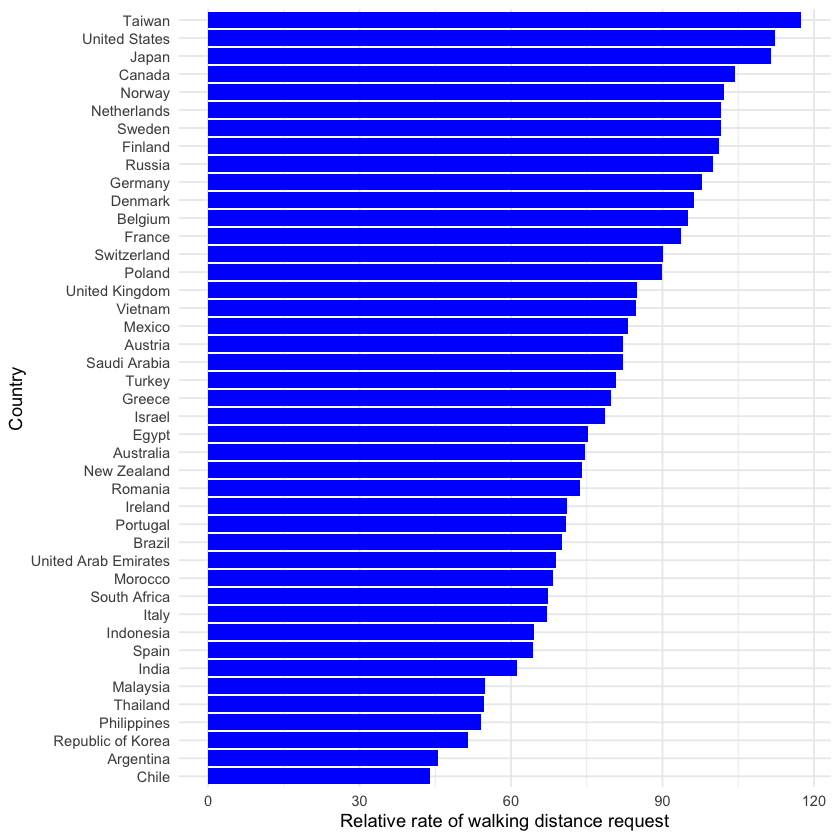

In [7]:
ggplot(country_avg, aes(y = reorder(country, walking_avg), weight = walking_avg)) + 
    xlab("Relative rate of walking distance request") +
    ylab("Country") +
    theme_minimal() +
    geom_bar(fill = "blue")

In [8]:
library(lubridate)

long_apple_data$day <- as_date(long_apple_data$day)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [9]:
italy_spain_data <- long_apple_data %>%
                filter(country == c("Italy", "Spain"), transportation_type == "walking") %>%
                group_by(country, day) %>%
                summarise(walking_avg = mean(mobility_data, na.rm = TRUE))

Warning message in country == c("Italy", "Spain"):
“longer object length is not a multiple of shorter object length”
`summarise()` regrouping output by 'country' (override with `.groups` argument)



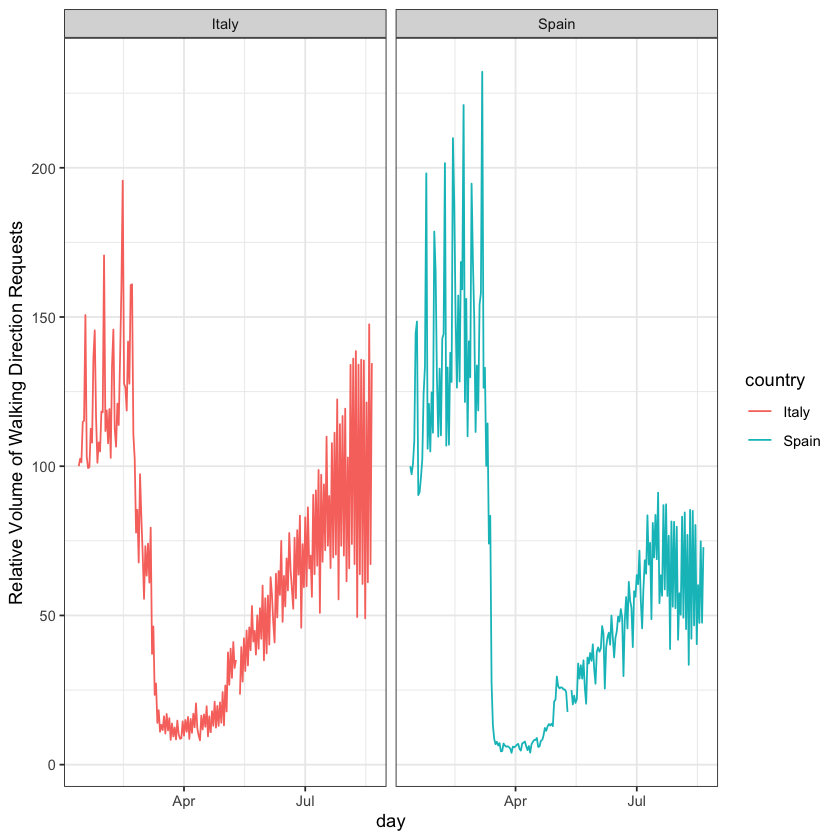

In [10]:
ggplot(italy_spain_data, aes(x = day, 
                             y = walking_avg, 
                             group = country, 
                             colour = country)) +
    geom_line() + 
    theme_bw() +
    ylab("Relative Volume of Walking Direction Requests") +
    facet_wrap(~ country) # ~ means explained by.